In [63]:
import pandas
import altair
import numpy
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

# Complaints

In [2]:
crime_data = pandas.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\3887304185.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pandas.read_csv("NYPD_Complaint_Data_Historic.csv")


In [3]:
def make_categorical(dataframe, column):
    # make the column of the dataframe categorical
    dataframe[column] = dataframe[column].astype('category')

# get a lst of all the columns in the dataframe that need to be categorical

columns = ['ADDR_PCT_CD', 'BORO_NM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'STATION_NAME', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_RACE', 'VIC_SEX']

    # make each column categorical
for column in columns:
    make_categorical(crime_data, column)




In [4]:
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         506547392   03/29/2018     20:30:00          NaN          NaN   
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD  \
0              32.0

In [5]:
#scrub for duplicate 
crime_data.drop_duplicates(inplace=True)
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         506547392   03/29/2018     20:30:00          NaN          NaN   
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD  \
0              32.0

In [6]:
#scrub for irrelevant data (only use required columns)
crime_data = crime_data[['CMPLNT_FR_DT','CMPLNT_FR_TM','Longitude','Latitude','VIC_SEX','VIC_RACE','VIC_AGE_GROUP']]


In [7]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN
2,11/21/2018,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN
3,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24
4,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...
7825494,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN
7825495,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18
7825496,11/19/2018,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44
7825497,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64


In [8]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT         655
CMPLNT_FR_TM          48
Longitude          17339
Latitude           17339
VIC_SEX              308
VIC_RACE             390
VIC_AGE_GROUP    1638445
dtype: int64


In [9]:
crime_data = crime_data.dropna(axis=0)

print(crime_data)

        CMPLNT_FR_DT CMPLNT_FR_TM  Longitude   Latitude VIC_SEX  \
0         03/29/2018     20:30:00 -73.941064  40.810877       F   
1         02/06/2018     23:15:00 -73.908014  40.873671       D   
2         11/21/2018     00:15:00 -73.885457  40.651782       D   
3         06/09/2018     21:42:00 -73.994706  40.759310       F   
4         11/10/2018     19:40:00 -73.970728  40.764536       D   
...              ...          ...        ...        ...     ...   
7825494   05/01/2008     18:55:00 -73.996540  40.756788       E   
7825495   05/18/2018     14:50:00 -74.102317  40.577953       M   
7825496   11/19/2018     02:25:00 -73.862427  40.743188       M   
7825497   02/03/2018     10:02:00 -74.089000  40.593665       M   
7825498   01/05/2018     14:40:00 -73.944529  40.688872       F   

                         VIC_RACE VIC_AGE_GROUP  
0                           WHITE         25-44  
1                         UNKNOWN       UNKNOWN  
2                         UNKNOWN       UNKNO

In [10]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT     0
CMPLNT_FR_TM     0
Longitude        0
Latitude         0
VIC_SEX          0
VIC_RACE         0
VIC_AGE_GROUP    0
dtype: int64


# CMPLNT_FR_DT


In [11]:
crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\3669391758.py:1: SettingWithCo

In [12]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,month,day,year
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44,3,29,2018
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2,6,2018
2,11/21/2018,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,11,21,2018
3,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,6,9,2018
4,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,11,10,2018
...,...,...,...,...,...,...,...,...,...,...
7825494,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,5,1,2008
7825495,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,5,18,2018
7825496,11/19/2018,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,11,19,2018
7825497,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2,3,2018


In [13]:
crime_data = crime_data.loc[crime_data['year'] >= 2006]

In [14]:
crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\2150539645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\2150539645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek


In [15]:
crime_data = crime_data.drop('CMPLNT_FR_DT', axis=1)
crime_data = crime_data.drop('month', axis=1)
crime_data = crime_data.drop('day', axis=1)
crime_data

,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week
0,20:30:00,-73.941064,40.810877,F,WHITE,25-44,2018,3
1,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1
2,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,2018,2
3,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5
4,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5
...,...,...,...,...,...,...,...,...
7825494,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3
7825495,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4
7825496,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0
7825497,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2018,5


# CMPLNT_FR_TM

In [16]:
crime_data[['hour','minute','second']] = crime_data['CMPLNT_FR_TM'].str.split(':',expand=True).astype(int)

In [17]:
crime_data = crime_data.drop('CMPLNT_FR_TM', axis=1)
crime_data = crime_data.drop('second', axis=1)
crime_data = crime_data.drop('minute', axis=1)
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.941064,40.810877,F,WHITE,25-44,2018,3,20
1,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,2018,2,0
3,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5,21
4,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5,19
...,...,...,...,...,...,...,...,...
7825494,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3,18
7825495,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4,14
7825496,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0,2
7825497,-74.089000,40.593665,M,WHITE,45-64,2018,5,10


# Grid the Longitude and Latitude

In [18]:
# Create a grid of points across the precincts to use as the center of the crime clusters
# The size of the grid is n x n, where n is the number of points in each direction
from shapely.geometry import Point, Polygon
from rtree import index

precint_footprint = gpd.read_file('Police Precincts.geojson')

# get the bounds of the precincts
min_x, min_y, max_x, max_y = precint_footprint.total_bounds

idx = index.Index()
for i, row in precint_footprint.iterrows():
    idx.insert(i, row.geometry.bounds)

grid_size = 100  # You can adjust this value
x_points = np.linspace(min_x, max_x, grid_size)
y_points = np.linspace(min_y, max_y, grid_size)

# Round the points to 4 decimal places
x_points = np.around(x_points, 4)
y_points = np.around(y_points, 4)

grid = [Point(x, y) for x in x_points for y in y_points]

# drop the points that are not within the precincts
def is_point_inside_precincts(point, precincts_gdf, idx):
    for i in idx.intersection(point.bounds):
        if point.within(precincts_gdf.iloc[i].geometry):
            return True
    return False

filtered_grid = [point for point in grid if is_point_inside_precincts(point, precint_footprint, idx)]
filtered_grid_df = pandas.DataFrame([(point.x, point.y) for point in filtered_grid], columns=['Longitude', 'Latitude'])
#
del grid
del filtered_grid

In [19]:
from scipy.spatial import cKDTree

# create a KD Tree with the Longitude and Latitude columns of filtered_grid_df
tree = cKDTree(filtered_grid_df[['Longitude', 'Latitude']])

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = tree.query(crime_data[['Longitude', 'Latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
crime_data['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
crime_data['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

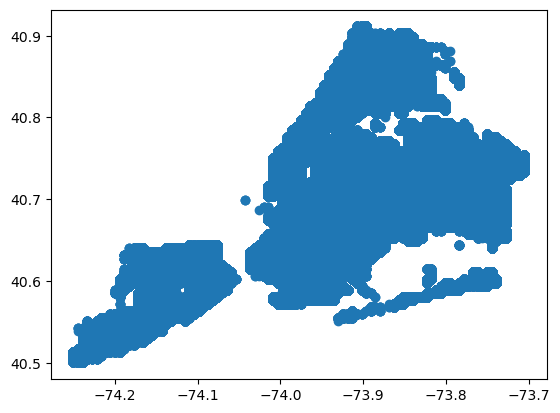

In [20]:
plt.scatter(crime_data['Longitude'], crime_data['Latitude'])

In [21]:
crime_data = crime_data.loc[crime_data['Longitude'] > -74.5]

In [22]:
crime_data = crime_data.loc[crime_data['Latitude'] < 42.5]

In [23]:
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20
1,-73.9077,40.8732,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.8852,40.6529,D,UNKNOWN,UNKNOWN,2018,2,0
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21
4,-73.9694,40.7630,D,UNKNOWN,UNKNOWN,2018,5,19
...,...,...,...,...,...,...,...,...
7825494,-73.9974,40.7588,E,UNKNOWN,UNKNOWN,2008,3,18
7825495,-74.1041,40.5766,M,WHITE HISPANIC,<18,2018,4,14
7825496,-73.8628,40.7418,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0,2
7825497,-74.0872,40.5936,M,WHITE,45-64,2018,5,10


# VIC_SEX

In [24]:
crime_data['VIC_SEX'].unique()

['F', 'D', 'E', 'M', 'U']
Categories (5, object): ['D', 'E', 'F', 'M', 'U']

In [25]:
# Only keep the M and F sex values
sexes = ['M', 'F']

crime_data = crime_data.loc[crime_data['VIC_SEX'].isin(sexes)]
# Re calculate the categories for the Sex column
crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()

del sexes
crime_data.head(5)

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18144\451495837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()


,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.9133,40.6359,M,BLACK,<18,2018,1,14
9,-73.9189,40.8266,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.9525,40.8054,M,BLACK,25-44,2018,2,18


In [26]:
crime_data['VIC_SEX'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

# VIC_RACE


In [27]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']
Categories (8, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']

In [28]:
# Keep everything except for UNKNOWN and OTHER
races = ['WHITE', 'WHITE HISPANIC', 'BLACK','ASIAN / PACIFIC ISLANdER', 'BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']

crime_data = crime_data.loc[crime_data['VIC_RACE'].isin(races)]
# Re calculate the categories for the Sex column
crime_data['VIC_RACE'] = crime_data['VIC_RACE'].cat.remove_unused_categories()

del races
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.9133,40.6359,M,BLACK,<18,2018,1,14
9,-73.9189,40.8266,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.9525,40.8054,M,BLACK,25-44,2018,2,18


In [29]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']
Categories (6, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'WHITE', 'WHITE HISPANIC']

# VIC_AGE_GROUP

In [30]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN', '-942', '1017',
       '-51', '954', '972', '951', '-55', '-1', '-966', '-59', '-974',
       '-948', '956', '-2', '-936', '-81', '-40', '-37', '-973', '-957',
       '-952', '-943', '-929', '-43', '-56', '-954', '943', '-961',
       '1018', '929', '936', '-71', '-50', '-69', '-967', '937', '-946',
       '941', '1013', '-39', '960', '927', '938', '-978', '-970', '950',
       '-934', '-4', '-62', '-3', '-960', '-921', '-61', '-48', '970',
       '963', '945', '-935', '-975', '-980', '-72', '946', '-959', '-931',
       '-972', '949', '-965', '-60', '1016', '932', '1014', '-968', '-31',
       '-963', '930', '-962', '-73', '-938', '-937', '-45', '-902', '-63',
       '-70', '-981', '928', '-964', '-950', '-971', '-945', '940', '-36',
       '-52', '922', '914', '926', '-78', '947', '810', '-923', '711',
       '924', '-982', '933', '309', '152', '962', '-32', '-969', '-976',
       '151', '808', '738', '912', '939', '942', '70

In [31]:
#remove values that don't belong to a victim age group
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==4, None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.startswith("-"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("<"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.endswith("+"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("UNKNOWN"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==3, None, crime_data['VIC_AGE_GROUP'])

In [32]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.9133,40.6359,M,BLACK,<18,2018,1,14
9,-73.9189,40.8266,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.9525,40.8054,M,BLACK,25-44,2018,2,18


In [33]:
#delete None
crime_data = crime_data.dropna(subset=['VIC_AGE_GROUP'])

In [34]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18 ', '45-64', '65+ '], dtype=object)

In [35]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.9133,40.6359,M,BLACK,<18,2018,1,14
9,-73.9189,40.8266,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.9525,40.8054,M,BLACK,25-44,2018,2,18


# One hot encoding

In [36]:
one_hot_encoded = pandas.get_dummies(crime_data[['VIC_SEX','VIC_RACE','VIC_AGE_GROUP']])
one_hot_encoded

,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,1,0,1,0,0,0
10,0,1,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825492,1,0,0,1,0,0,0,0,0,1,0,0,0
7825493,0,1,0,0,0,0,0,1,0,0,1,0,0
7825495,0,1,0,0,0,0,0,1,0,0,0,0,1
7825497,0,1,0,0,0,0,1,0,0,0,1,0,0


In [37]:
one_hot_encoded_df = crime_data

# concatenate the one-hot encoded columns with the original dataframe
one_hot_encoded_df = pandas.concat([one_hot_encoded_df, one_hot_encoded], axis=1)


In [38]:
one_hot_encoded_df

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,...,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-73.9413,40.8096,F,WHITE,25-44,2018,3,20,1,0,...,0,0,0,1,0,0,1,0,0,0
3,-73.9974,40.7588,F,WHITE HISPANIC,18-24,2018,5,21,1,0,...,0,0,0,0,1,1,0,0,0,0
8,-73.9133,40.6359,M,BLACK,<18,2018,1,14,0,1,...,1,0,0,0,0,0,0,0,0,1
9,-73.9189,40.8266,F,WHITE HISPANIC,25-44,2018,5,22,1,0,...,0,0,0,0,1,0,1,0,0,0
10,-73.9525,40.8054,M,BLACK,25-44,2018,2,18,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825492,-73.8908,40.8647,F,BLACK,25-44,2018,5,20,1,0,...,1,0,0,0,0,0,1,0,0,0
7825493,-73.9077,40.8562,M,WHITE HISPANIC,45-64,2018,1,15,0,1,...,0,0,0,0,1,0,0,1,0,0
7825495,-74.1041,40.5766,M,WHITE HISPANIC,<18,2018,4,14,0,1,...,0,0,0,0,1,0,0,0,0,1
7825497,-74.0872,40.5936,M,WHITE,45-64,2018,5,10,0,1,...,0,0,0,1,0,0,0,1,0,0


In [39]:
# drop the VIC_SEX, VIC_Race, and VIC_AGE_GROUP columns
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_SEX', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_RACE', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_AGE_GROUP', axis=1)

In [40]:
crime_counts = (
    one_hot_encoded_df.groupby(['Longitude', 'Latitude', 'year', 'day_of_week', 'hour'])
    .sum()
)

In [41]:
crime_counts.reset_index(inplace=True)
crime_counts

,Longitude,Latitude,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-74.2500,40.5004,2006,0,17,2,0,0,0,0,0,2,0,0,0,0,0,2
1,-74.2500,40.5004,2006,1,10,0,1,0,0,0,0,1,0,1,0,0,0,0
2,-74.2500,40.5004,2006,1,13,0,1,0,0,0,0,1,0,0,0,1,0,0
3,-74.2500,40.5004,2006,3,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,-74.2500,40.5004,2006,4,8,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601602,-73.7056,40.7546,2021,5,13,0,1,0,0,0,0,1,0,0,1,0,0,0
2601603,-73.7056,40.7546,2021,5,22,1,0,0,1,0,0,0,0,0,1,0,0,0
2601604,-73.7056,40.7546,2021,6,11,0,1,0,1,0,0,0,0,0,1,0,0,0
2601605,-73.7056,40.7546,2021,6,16,0,1,0,1,0,0,0,0,0,1,0,0,0


# Trees

In [42]:
rows = None

trees = gpd.read_file('2015 Street Tree Census - Tree Data.geojson', rows=rows)


In [43]:
#scrub for duplicate 
trees.drop_duplicates(inplace=True)
print(trees)

         nta health zipcode     latitude               nta_name     state  \
0       QN17   Fair   11375  40.72309177           Forest Hills  New York   
1       QN49   Fair   11357  40.79411067             Whitestone  New York   
2       BK90   Good   11211  40.71758074      East Williamsburg  New York   
3       BK90   Good   11211  40.71353749      East Williamsburg  New York   
4       BK37   Good   11215  40.66677776     Park Slope-Gowanus  New York   
...      ...    ...     ...          ...                    ...       ...   
683783  BK73   Good   11211  40.71321078  North Side-South Side  New York   
683784  QN17   Good   11375  40.71519444           Forest Hills  New York   
683785  SI07   Good   10314  40.62076153            Westerleigh  New York   
683786  BX41   Good   10457  40.85082819             Mount Hope  New York   
683787  QN41   Fair   11365  40.73216525   Fresh Meadows-Utopia  New York   

       trnk_wire           y_sp brnch_othe root_grate  ...  \
0            

In [44]:
trees = trees[['health','latitude','longitude']]

In [45]:
trees['Latitude'] = trees['latitude'].astype(float)

In [46]:
trees['Longitude'] = trees['longitude'].astype(float)

In [47]:
trees = trees.drop('longitude', axis=1)
trees = trees.drop('latitude', axis=1)

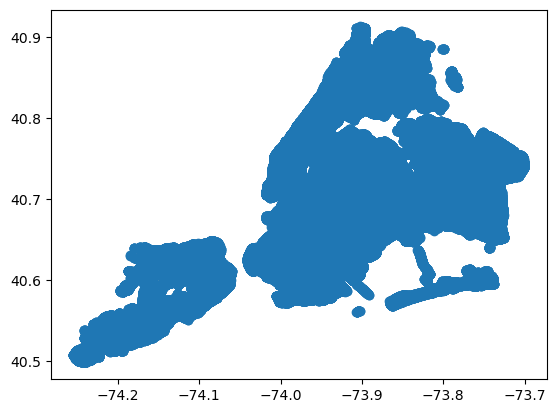

In [48]:
plt.scatter(trees['Longitude'], trees['Latitude'])

In [49]:
tree_counts = (
    trees.groupby(['Longitude', 'Latitude','health'])
    .size()
    .reset_index(name='tree_count')
)

In [50]:
tree_counts.head()

tree_counts_pivoted = pandas.pivot_table(tree_counts, values='tree_count', index=['Longitude', 'Latitude'], columns=['health'], fill_value=0)
tree_counts_pivoted = tree_counts_pivoted.reset_index().rename(columns={'Good': 'good_tree_count', 'Fair': 'fair_tree_count', 'Poor': 'poor_tree_count'})

# Remove index name
tree_counts_pivoted.index.name = None

In [51]:
tree_counts_pivoted

health,Longitude,Latitude,fair_tree_count,good_tree_count,poor_tree_count
0,-74.254965,40.507613,0,1,0
1,-74.254895,40.507487,0,1,0
2,-74.254876,40.507454,0,1,0
3,-74.254857,40.507419,0,1,0
4,-74.254834,40.507378,0,1,0
...,...,...,...,...,...
651776,-73.700601,40.739695,1,0,0
651777,-73.700597,40.739652,0,1,0
651778,-73.700594,40.739626,0,1,0
651779,-73.700592,40.740876,0,1,0


# Grid the longitude and latitude


In [52]:
from scipy.spatial import cKDTree

# create a KD Tree with the Longitude and Latitude columns of filtered_grid_df
tree = cKDTree(filtered_grid_df[['Longitude', 'Latitude']])

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = tree.query(tree_counts_pivoted[['Longitude', 'Latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
tree_counts_pivoted['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
tree_counts_pivoted['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

In [53]:
tree_counts_by_location = tree_counts_pivoted.groupby(['Longitude', 'Latitude']).sum().reset_index()
tree_counts_by_location

health,Longitude,Latitude,fair_tree_count,good_tree_count,poor_tree_count
0,-74.2500,40.5004,20,154,0
1,-74.2500,40.5046,58,681,17
2,-74.2500,40.5088,30,415,7
3,-74.2500,40.5131,4,99,7
4,-74.2444,40.5004,66,353,22
...,...,...,...,...,...
3024,-73.7056,40.7376,37,514,3
3025,-73.7056,40.7418,29,647,9
3026,-73.7056,40.7461,110,549,16
3027,-73.7056,40.7503,57,464,30


In [58]:
crime_counts

,Longitude,Latitude,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-74.2500,40.5004,2006,0,17,2,0,0,0,0,0,2,0,0,0,0,0,2
1,-74.2500,40.5004,2006,1,10,0,1,0,0,0,0,1,0,1,0,0,0,0
2,-74.2500,40.5004,2006,1,13,0,1,0,0,0,0,1,0,0,0,1,0,0
3,-74.2500,40.5004,2006,3,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,-74.2500,40.5004,2006,4,8,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601602,-73.7056,40.7546,2021,5,13,0,1,0,0,0,0,1,0,0,1,0,0,0
2601603,-73.7056,40.7546,2021,5,22,1,0,0,1,0,0,0,0,0,1,0,0,0
2601604,-73.7056,40.7546,2021,6,11,0,1,0,1,0,0,0,0,0,1,0,0,0
2601605,-73.7056,40.7546,2021,6,16,0,1,0,1,0,0,0,0,0,1,0,0,0


In [59]:
merged_data = pandas.merge(crime_counts, tree_counts_by_location, on=['Longitude', 'Latitude'], how='left')


In [60]:
merged_data

,Longitude,Latitude,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,...,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,fair_tree_count,good_tree_count,poor_tree_count
0,-74.2500,40.5004,2006,0,17,2,0,0,0,0,...,2,0,0,0,0,0,2,20.0,154.0,0.0
1,-74.2500,40.5004,2006,1,10,0,1,0,0,0,...,1,0,1,0,0,0,0,20.0,154.0,0.0
2,-74.2500,40.5004,2006,1,13,0,1,0,0,0,...,1,0,0,0,1,0,0,20.0,154.0,0.0
3,-74.2500,40.5004,2006,3,1,0,1,0,0,0,...,1,0,1,0,0,0,0,20.0,154.0,0.0
4,-74.2500,40.5004,2006,4,8,0,1,0,0,0,...,1,0,0,0,1,0,0,20.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601602,-73.7056,40.7546,2021,5,13,0,1,0,0,0,...,1,0,0,1,0,0,0,24.0,57.0,12.0
2601603,-73.7056,40.7546,2021,5,22,1,0,0,1,0,...,0,0,0,1,0,0,0,24.0,57.0,12.0
2601604,-73.7056,40.7546,2021,6,11,0,1,0,1,0,...,0,0,0,1,0,0,0,24.0,57.0,12.0
2601605,-73.7056,40.7546,2021,6,16,0,1,0,1,0,...,0,0,0,1,0,0,0,24.0,57.0,12.0


In [61]:
import pickle

with open('merged_data.pickle', 'wb') as f:
    pickle.dump(merged_data, f)

# LAB 4

# Proxies

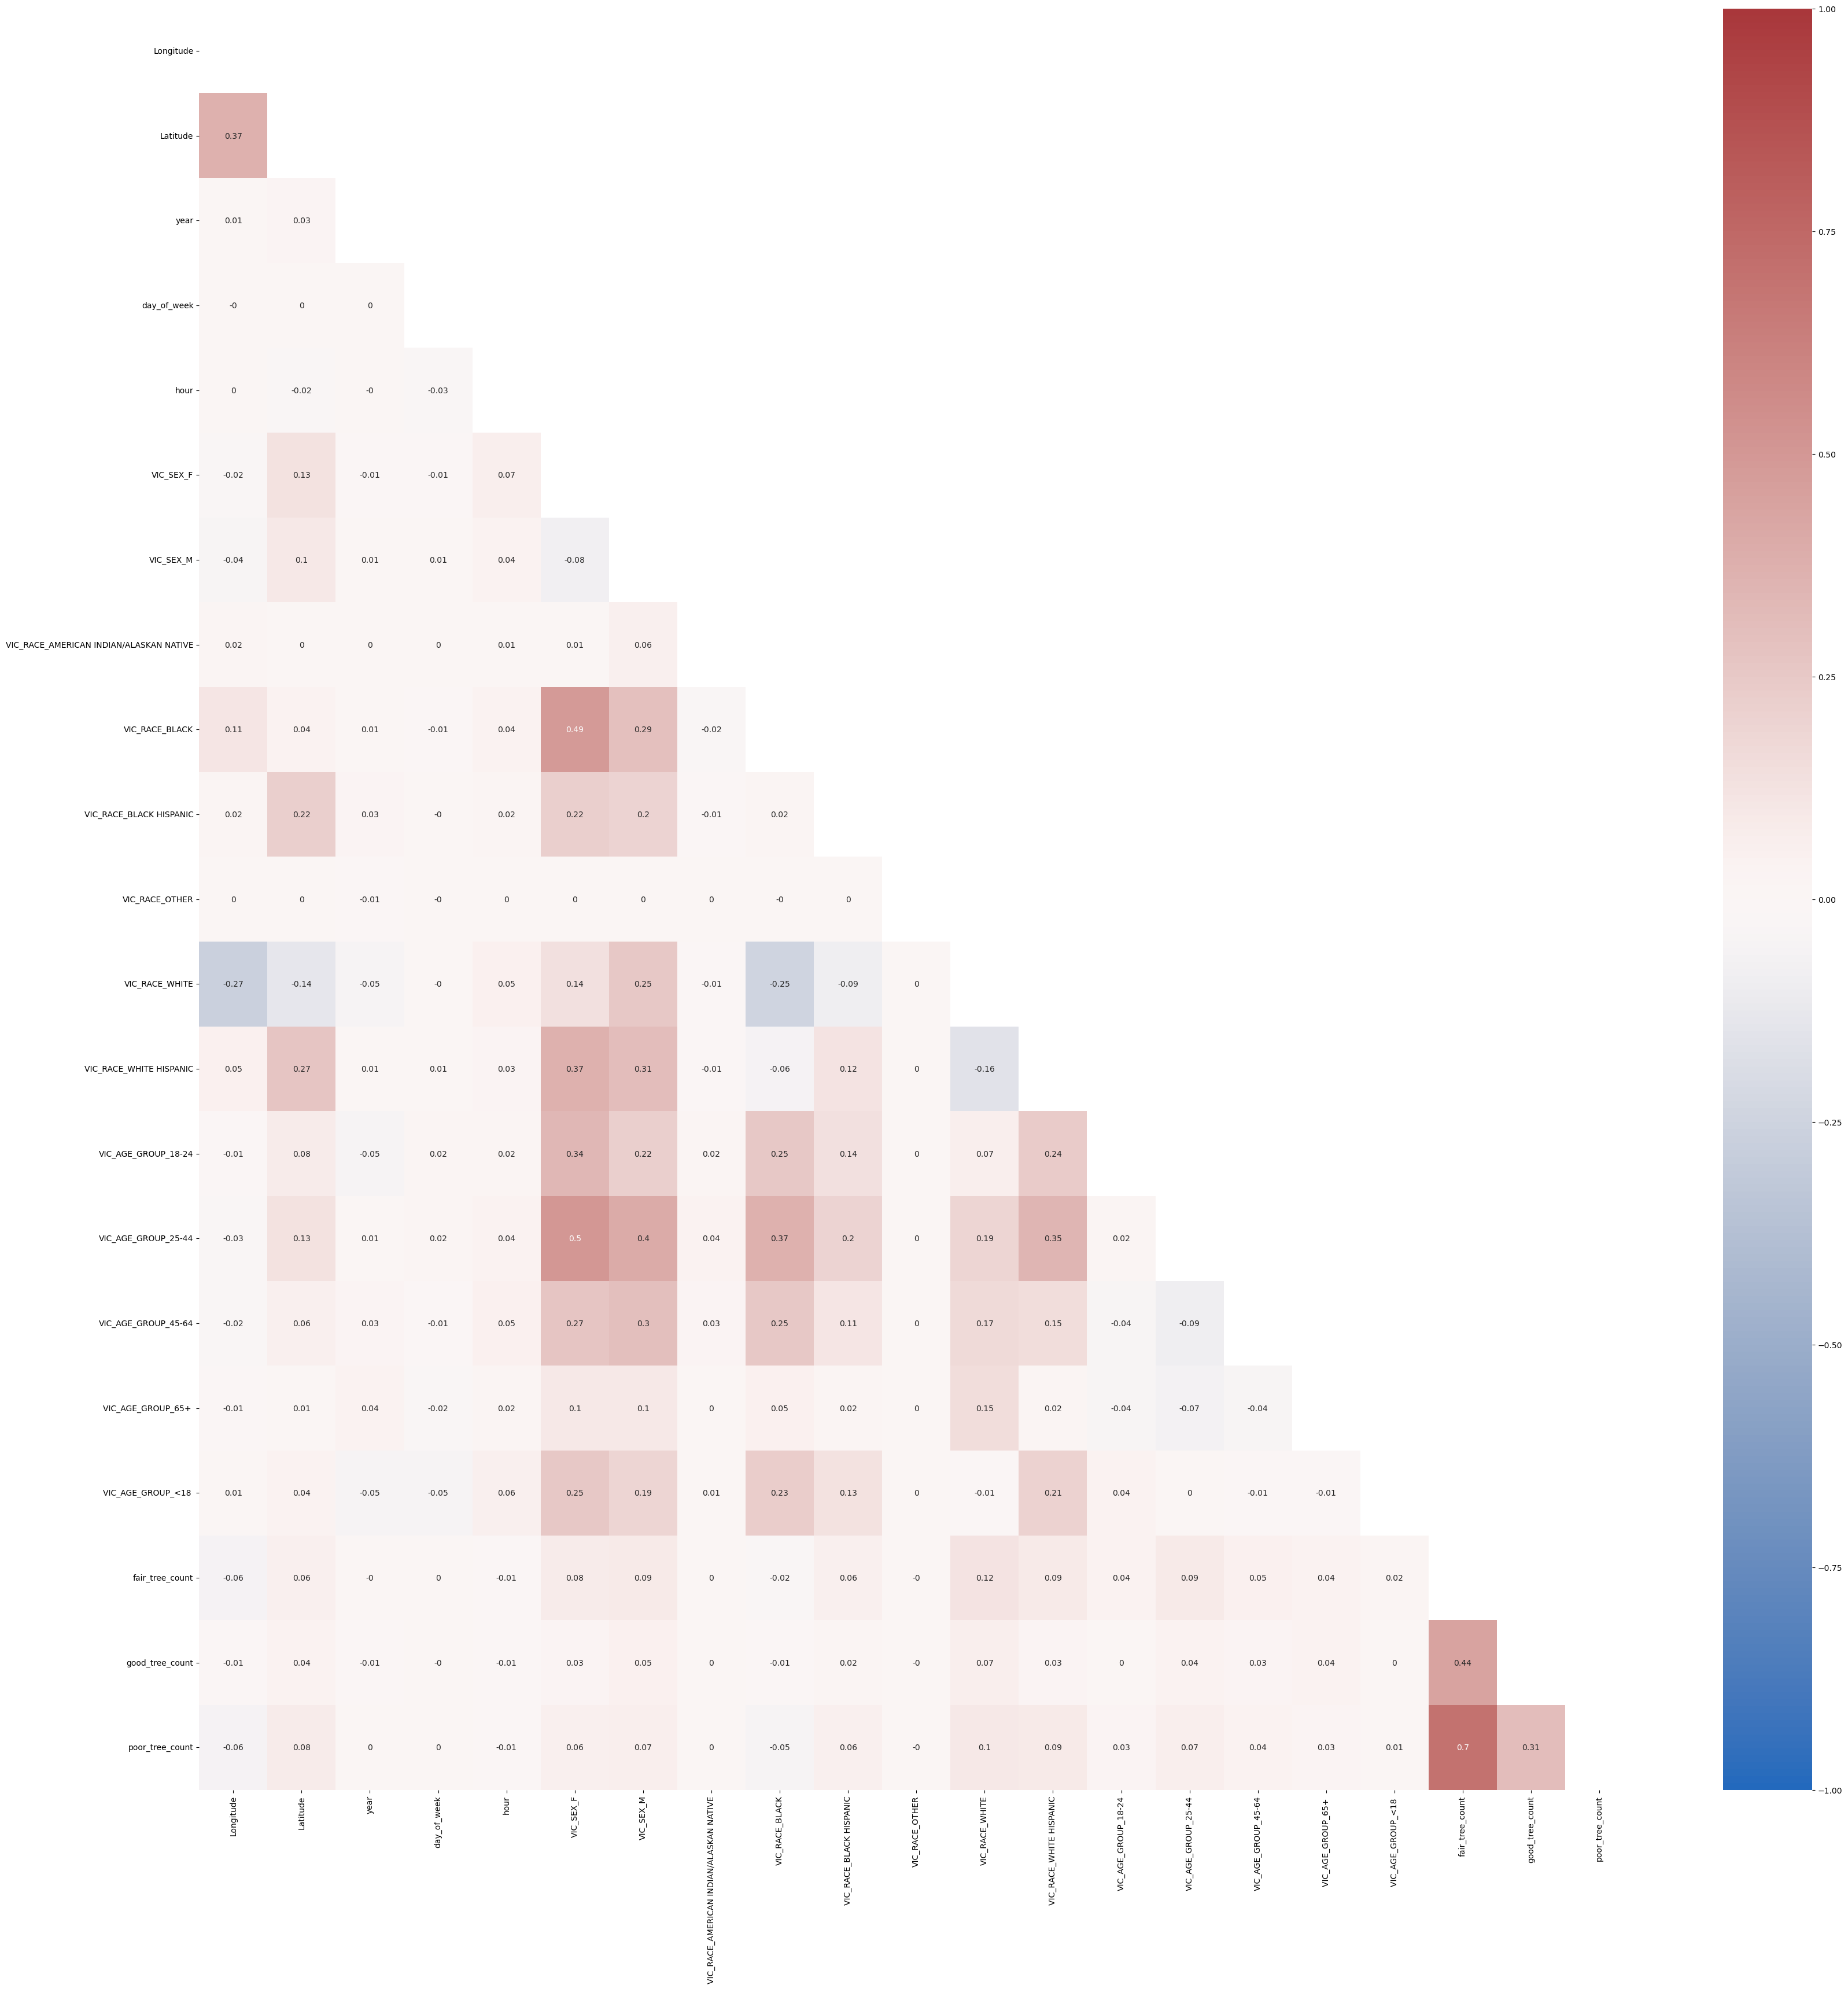

In [64]:
corr_matrix = merged_data.corr().round(2)
# print(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))       
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, ax=ax)
plt.show()

# Representation bias

In [75]:
merged_data2010 = merged_data.loc[merged_data['year'] == 2010]

In [76]:
merged_data2010['VIC_SEX_F'].sum()

167085

In [77]:
merged_data2010['VIC_SEX_M'].sum()

128287

In [78]:
merged_data2010

,Longitude,Latitude,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,...,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,fair_tree_count,good_tree_count,poor_tree_count
24,-74.2500,40.5004,2010,0,12,1,0,0,0,0,...,1,0,1,0,0,0,0,20.0,154.0,0.0
25,-74.2500,40.5004,2010,2,12,0,1,0,0,0,...,1,0,0,1,0,0,0,20.0,154.0,0.0
26,-74.2500,40.5004,2010,5,15,0,1,0,0,0,...,1,0,0,0,1,0,0,20.0,154.0,0.0
27,-74.2500,40.5004,2010,6,14,1,0,0,0,0,...,1,0,1,0,0,0,0,20.0,154.0,0.0
131,-74.2500,40.5046,2010,0,9,0,1,0,0,0,...,1,0,1,0,0,0,0,58.0,681.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601270,-73.7056,40.7546,2010,6,12,0,1,0,0,0,...,1,0,1,0,0,0,0,24.0,57.0,12.0
2601271,-73.7056,40.7546,2010,6,13,0,1,0,0,0,...,1,0,0,0,1,0,0,24.0,57.0,12.0
2601272,-73.7056,40.7546,2010,6,15,0,1,0,0,0,...,1,0,0,0,1,0,0,24.0,57.0,12.0
2601273,-73.7056,40.7546,2010,6,16,0,1,0,0,0,...,1,0,1,0,0,0,0,24.0,57.0,12.0
